In [28]:
import pandas as pd
from io import StringIO
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

result_60_20_20 = pd.read_csv("/scratch/network/ao3526/Results/BldType/CNN_ResNet18/60_20_20/Results.csv")
result_80_10_10 = pd.read_csv("/scratch/network/ao3526/Results/BldType/CNN_ResNet18/80_10_10/Results.csv")
result_90_5_5 = pd.read_csv("/scratch/network/ao3526/Results/BldType/CNN_ResNet18/90_5_5/Results.csv")

# Function to calculate confusion matrix
def plot_confusion_matrix(ax, cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues, fontsize=10, colorbar_fontsize=8):
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title, fontsize=fontsize)
    cbar = plt.colorbar(im, ax=ax)
    cbar.ax.tick_params(labelsize=colorbar_fontsize)  # Adjust colorbar label font size

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45, fontsize=fontsize)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes, fontsize=fontsize)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color='white' if cm[i, j] > thresh else 'black', fontsize=fontsize)

    ax.set_ylabel('True label', fontsize=fontsize)
    ax.set_xlabel('Predicted label', fontsize=fontsize)

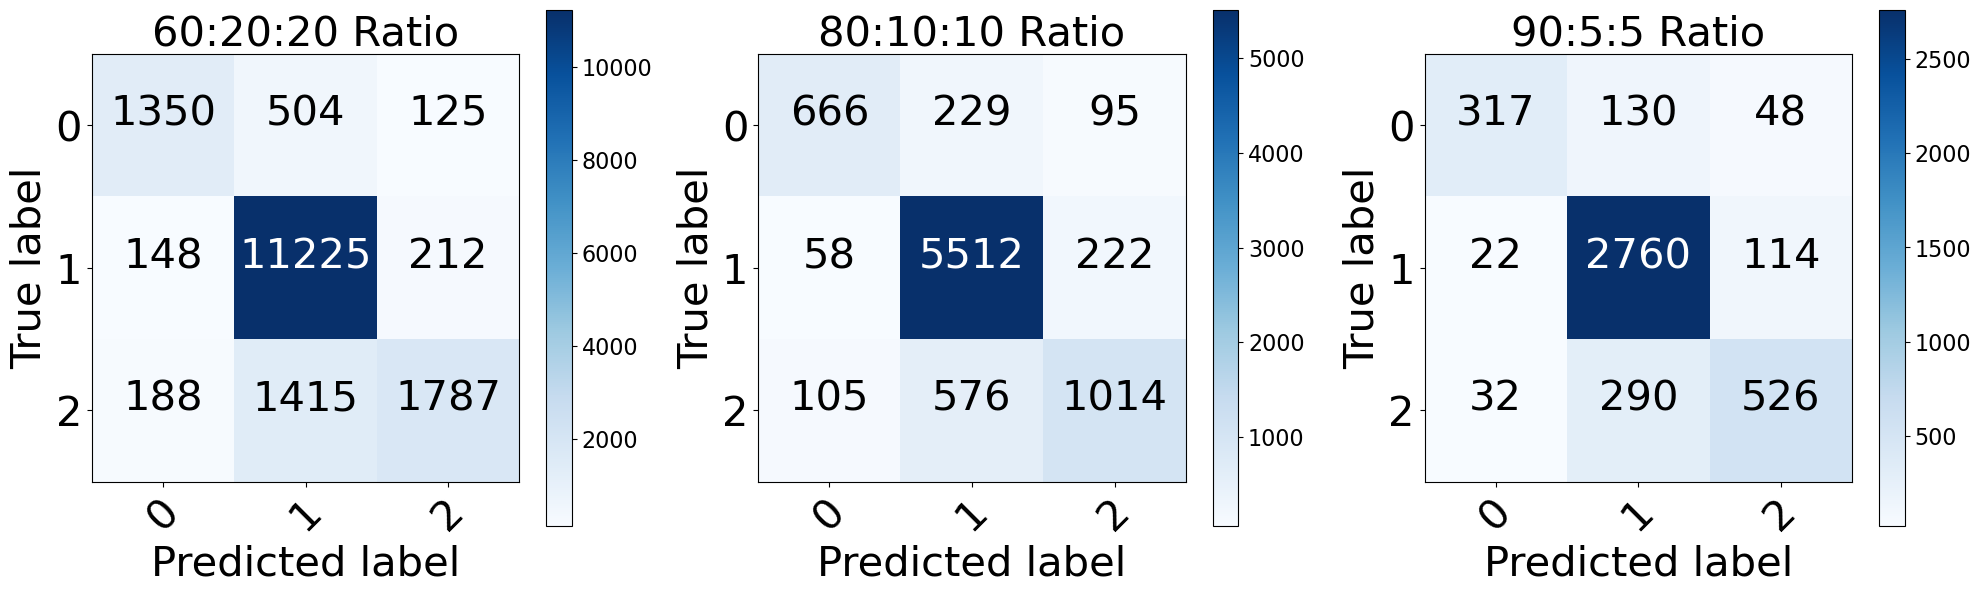

In [32]:
ground_truth_60_20_20 = result_60_20_20['Ground Truth']
predicted_classes_60_20_20 = result_60_20_20['Predicted Value']

ground_truth_80_10_10 = result_80_10_10['Ground Truth']
predicted_classes_80_10_10 = result_80_10_10['Predicted Value']

ground_truth_90_5_5 = result_90_5_5['Ground Truth']
predicted_classes_90_5_5 = result_90_5_5['Predicted Value']

cm_test_60_20_20 = confusion_matrix(ground_truth_60_20_20, predicted_classes_60_20_20)
cm_test_80_10_10 = confusion_matrix(ground_truth_80_10_10, predicted_classes_80_10_10)
cm_test_90_5_5 = confusion_matrix(ground_truth_90_5_5, predicted_classes_90_5_5)

# Create a figure for the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plot_confusion_matrix(axes[0], cm_test_60_20_20, test_label_encoder.classes_, '60:20:20 Ratio', fontsize=30, colorbar_fontsize=16)
plot_confusion_matrix(axes[1], cm_test_80_10_10, test_label_encoder.classes_, '80:10:10 Ratio', fontsize=30, colorbar_fontsize=16)
plot_confusion_matrix(axes[2], cm_test_90_5_5, test_label_encoder.classes_, '90:5:5 Ratio', fontsize=30, colorbar_fontsize=16)
plt.tight_layout()
plt.show()